## Kaggle chalenge :
#### IEEE-CIS Fraud Detection
###### Objectives : 
- Explore anomaly detection algorithms
- Build an end to end solution 
- Export model to GCP and explore solutions to run it in production 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import os

In [7]:
# Directories
data_rep = "data"
if not os.path.exists(data_rep):
    os.makedirs(data_rep)
results_rep = "results"
if not os.path.exists(results_rep):
    os.makedirs(results_rep)
models_rep = "models"
if not os.path.exists(models_rep):
    os.makedirs(models_rep)
    
# Read data downloaded from github
df_id = pd.read_csv(os.path.join(data_rep, 'train_identity.csv'))
df_tr = pd.read_csv(os.path.join(data_rep, 'train_transaction.csv'))

### Data exploration 

TransactionID    144233
id_01            144233
id_02            140872
id_03             66324
id_04             66324
id_05            136865
id_06            136865
id_07              5155
id_08              5155
id_09             74926
id_10             74926
id_11            140978
id_12            144233
id_13            127320
id_14             80044
id_15            140985
id_16            129340
id_17            139369
id_18             45113
id_19            139318
id_20            139261
id_21              5159
id_22              5169
id_23              5169
id_24              4747
id_25              5132
id_26              5163
id_27              5169
id_28            140978
id_29            140978
id_30             77565
id_31            140282
id_32             77586
id_33             73289
id_34             77805
id_35            140985
id_36            140985
id_37            140985
id_38            140985
DeviceType       140810
DeviceInfo       118666
dtype: int64

TransactionID    144233
id_01                77
id_02            115655
id_03                24
id_04                15
id_05                93
id_06               101
id_07                84
id_08                94
id_09                46
id_10                62
id_11               365
id_12                 2
id_13                54
id_14                25
id_15                 3
id_16                 2
id_17               104
id_18                18
id_19               522
id_20               394
id_21               490
id_22                25
id_23                 3
id_24                12
id_25               341
id_26                95
id_27                 2
id_28                 2
id_29                 2
id_30                75
id_31               130
id_32                 4
id_33               260
id_34                 4
id_35                 2
id_36                 2
id_37                 2
id_38                 2
DeviceType            2
DeviceInfo         1786
dtype: int64

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

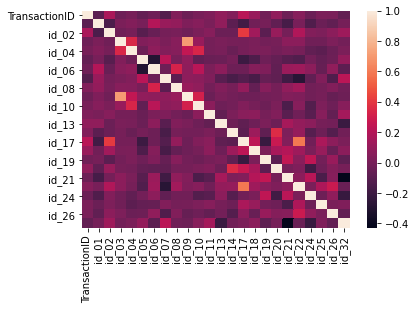

TransactionID     590540
isFraud           590540
TransactionDT     590540
TransactionAmt    590540
ProductCD         590540
                   ...  
V335               82351
V336               82351
V337               82351
V338               82351
V339               82351
Length: 394, dtype: int64

TransactionID     590540
isFraud                2
TransactionDT     573349
TransactionAmt     20902
ProductCD              5
                   ...  
V335                 672
V336                 356
V337                 254
V338                 380
V339                 334
Length: 394, dtype: int64

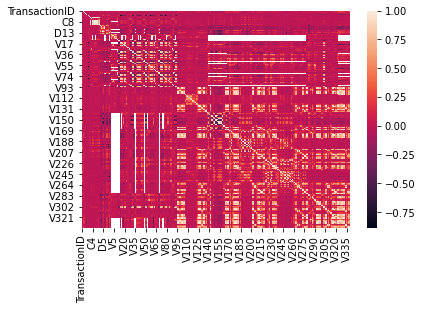

In [11]:
display(df_id.count())
display(df_id.nunique())
display(df_id.columns)
sns.heatmap(df_id.corr())
plt.show()

display(df_tr.count())
display(df_tr.nunique())
sns.heatmap(df_tr.corr())
plt.show()


In [18]:
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
y = df_tr.isFraud.values
df_tr.drop(['isFraud', 'TransactionID'], inplace=True, axis=1)
x = df_tr.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
categorical_features = ['DeviceType', 'DeviceInfo', 'id_12', 'id_38']
train_data = lightgbm.Dataset(x, label=y, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(x_test, label=y_test)